# Week 3


Today's lecture has two main focuses:

__Part 1: Wrapping up Data Collection:__ We're finishing our deep dive into data collection using the OpenAlex API. 
We'll retrieve:      

- information about the author, such as country and citation count.    
- information about publications, such as titles and abstracts.     

The goal is to become comfortable handling **large, real-world datasets.**

 *A little warning*: In this week's exercises you will retreive and process a **large amount of data**. If you find the process tedious and overwhelming at times, you are not alone! That's a completely normal part of dealing with real data.     
 
 But don't worry, I'll guide you through step by step, and I'm always available to help, on Teams or in class. There are three simple rules for success:    

- Follow thoroughly the step-by-step instructions.   
- Stay on top of your work weekly.    
- If you are stuck, come and talk to me during class/ask me via Teams.    

__Parts 2 and 3: Introduction to Data Visualization + Visualizing Distributions:__ Next, we shift to a lighter topic: **Data Visualization.** There will be some video lectures on general aspects of Data Visualization. Then we'll start with visualizing histograms. You may feel already confident with plotting histograms, but we'll explore new angles, especially when it comes to visualizing data that's spread out across a wide range. You will start seeing the value of the data we've collected and starting to analyze it in practical ways.


This is probably the most intense lecture of the course in terms of coding. Once you are on the other side from this one, it will feel much smoother from there. 

## Part 1: Wrapping up the data collection

You're now equipped to tackle more challenging tasks with the OpenAlex API. In this part of the course, we will build the **Computational Social Science dataset step by step**. 

The key idea is that each dataset builds on the previous one. Think of this as a pipeline:    
- **Stage 1:** We start from a list of *IC2S2 authors* (from Week 2).    
- **Stage 2:** We collect their scientific papers.    
- **Stage 3:** From those papers, we identify their *co-authors* — researchers who wrote papers together with them — and then collect papers written by those co-authors.    
- **Stage 4:** Finally, we merge everything into one unified dataset representing the Computational Social Science field.    


**Why do we collect data this way?**
Researchers do not attend all conferences, even if those conferences are relevant to their work. If we only included IC2S2 participants, we would capture only a visible subset of the field. For this reason, we expand our scope to include the collaborators of the IC2S2 authors — the *IC2S2 co-authors*. By moving one step outward through co-authorship links, we obtain a more realistic approximation of the Computational Social Science research community. In network science, this strategy is closely related to [snowball sampling](https://en.wikipedia.org/wiki/Snowball_sampling): starting from a seed set and expanding through observed connections.

**In Exercise 1**, you will collect all research articles written by the IC2S2 authors (~1500 researchers). Even though this seems manageable, efficiency already matters — the code you write here will be reused in the next exercise.

**In Exercise 2**, we expand to include the collaborators of the IC2S2 authors (the IC2S2 co-authors). This step significantly increases the dataset size. You'll be managing **many** API requests here. This makes it crucial to write code that's not just functional but also efficient.

**Overview of the Datasets we collect** 
![Data collection pipeline](https://raw.githubusercontent.com/lalessan/comsocsci2026/master/images/schema_data.png)


<div style="
  border-left: 6px solid #c0392b;
  background-color: #f8d7da;
  padding: 1em 1.2em;
  border-radius: 6px;
  max-width: 650px;
  margin: 1.5em auto;
  color: #222;
">

**⚠ Before Exercise 1: Get an API key**

Starting **February 13, 2026**, an API key is required to use the OpenAlex API.

Steps for success: 

- [Sign up](https://openalex.org/login?redirect=/settings/api) and authenticate.     
- [Copy your API key](https://openalex.org/settings/api).   
- add ``api_key=YOUR_KEY`` to your API calls. When you use the ``requests`` library you can add it to your ``params`` dictionary.    


</div>




> **Exercise 1: Collecting Research Articles from IC2S2 Authors**
>
>In this exercise, we'll leverage the OpenAlex API to gather information on research articles authored by participants of the IC2S2 2025 conference, referred to as *IC2S2 authors*. **Before you start, please ensure you read through the entire exercise.**
>
> 
> **Steps:**
>  
> 1. **Retrieve Data:** Start with the dataset of *IC2S2 authors* you collected in Week 2, Exercise 3 (called dataset D1 in the figure above). Use the OpenAlex API [works endpoint](https://docs.openalex.org/api-entities/works) to fetch their research articles. For each article, retrieve the following details:
>    - _id_: The unique OpenAlex ID for the work.
>    - _publication_year_: The year the work was published.
>    - _cited_by_count_: The number of times the work has been cited by other works.
>    - _author_ids_: The OpenAlex IDs for the authors of the work.
>    - _title_: The title of the work.
>    - _abstract_inverted_index_: The abstract of the work, formatted as an inverted index.
> 
>     **Important Note on Paging:** By default, the OpenAlex API limits responses to 25 works per request. For more efficient data retrieval, I suggest to adjust this limit to 200 works per request. Even with this adjustment, you will need to implement pagination to access all available works for a given query. This ensures you can systematically retrieve the complete set of works beyond the initial 200. Find guidance on implementing pagination [here](https://docs.openalex.org/how-to-use-the-api/get-lists-of-entities/paging#cursor-paging).
>
> 2. **Data Storage:** Organize the retrieved information into two Pandas DataFrames and save them to two files in a suitable format:
>    - Dataset D2: The *IC2S2 papers* dataset should include: *id, publication\_year, cited\_by\_count, author\_ids*.
>    - Dataset D3: The *IC2S2 abstracts* dataset should include: *id, title, abstract\_inverted\_index*.
>  
>
> **Filters:**
> To ensure the data we collect is relevant and manageable, apply the following filters:
>     
>    - Only include *IC2S2 authors* with a total work count between 5 and 5,000.    
>    - Retrieve only works that have received more than 10 citations.    
>    - Limit to works authored by fewer than 10 individuals.    
>    - Include only works relevant to Computational Social Science (focusing on: Sociology OR Psychology OR Economics OR Political Science) AND intersecting with a quantitative discipline (Mathematics OR Physics OR Computer Science), as defined by their [Concepts](https://docs.openalex.org/api-entities/works/work-object#concepts). *Note*: here we only consider Concepts at *level=0* (the most coarse definition of concepts).     
>
> **Efficiency Tips:**
> Writing efficient code in this exercise is **crucial**. To speed up your process:
> 
> - **Apply filters directly in your request:** When possible, use the [filter parameter](https://docs.openalex.org/api-entities/works/filter-works) of the *works* endpoint to apply the filters above directly in your API request, ensuring only relevant data is returned. Learn about combining multiple filters [here](https://docs.openalex.org/how-to-use-the-api/get-lists-of-entities/filter-entity-lists).  
> - **Bulk requests:** Instead of sending one request for each author, you can use the [filter parameter](https://docs.openalex.org/api-entities/works/filter-works) to query works by multiple authors in a single request. *Note: My testing suggests that can only include up to 25 authors per request.*
> - **Use multiprocessing:** Implement multiprocessing to handle multiple requests simultaneously. I highly recommmend [Joblib’s Parallel](https://joblib.readthedocs.io/en/stable/) function for that, and [tqdm](https://tqdm.github.io/) can help monitor progress of your jobs. Remember to stay within [the rate limit](https://docs.openalex.org/how-to-use-the-api/rate-limits-and-authentication) of 100 requests per second.
>
>
>   
> For reference, employing these strategies allowed me to fetch the data in about 30 seconds using 5 cores on my laptop. I obtained a dataset of approximately 25 MB (including both the *IC2S2 abstracts* and *IC2S2 papers* files).
> 
>
> **Data Overview and Reflection questions:** Answer the following questions: 
> 
> - **Dataset summary.** How many works are listed in your Dataset D2 (*IC2S2 papers*) dataframe? How many unique researchers have co-authored these works?     
> - **Efficiency in code.** Describe the strategies you implemented to make your code more efficient. How did your approach affect your code's execution time?    
> - **Filtering Criteria and Dataset Relevance** Reflect on the rationale behind setting specific thresholds for the total number of works by an author, the citation count, the number of authors per work, and the relevance of works to specific fields. How do these filtering criteria contribute to the relevance of the dataset you compiled? Do you believe any aspects of Computational Social Science research might be underrepresented or overrepresented as a result of these choices?    

<div style="
  border:1px solid #5b2ca0;
  border-radius:10px;
  margin:20px 0;
  background:#ede0ff;
  padding:22px;
  color:#2b003d;
  line-height:1.6;
  max-width:100%;
  box-sizing:border-box;
  overflow-wrap:break-word;
">
<p>
To maximise learning and ensure a correct solution, avoid LLMs to solve the exercise. 
As ususal it is important to solve the exercise in a "modular" way.
Start by making an API request for a single author, inspect the response carefully, and try a few different names to discover potential issues and address them.  
Once you’re satisfied with your approach, work on scaling up the solution and run the requests for many authors. 
If you'd like, once you have a working code, you can ask an LLM for suggestions on how to improve efficiency.
</p>
</div>

In [36]:
import pandas as pd
import requests
import time
import unicodedata
import re
import json
import numpy as np

In [2]:
api_key = "NkafC7tV5c7anrujEZT7xI"
BASE_URL = "https://api.openalex.org/works"

In [3]:
authors_df = pd.read_csv("openalex_authors_from_cleaned_names.csv")

# keep only authors with valid OpenAlex IDs
authors_df = authors_df.dropna(subset=["id"])

# filter work count between 5 and 5000
authors_df = authors_df[
    (authors_df["works_count"] >= 5) &
    (authors_df["works_count"] <= 5000)
]

author_ids = authors_df["id"].tolist()

print("Authors after filter:", len(author_ids))

Authors after filter: 1287


In [4]:
def chunks(lst, n=25):
    for i in range(0, len(lst), n):
        yield lst[i:i+n]

author_chunks = list(chunks(author_ids, 25))
print("Number of author chunks:", len(author_chunks))


Number of author chunks: 52


In [5]:
PER_PAGE = 200
SLEEP = 0.2

def fetch_works_for_author_chunk(author_chunk):

    author_filter = "|".join(author_chunk)

    # OR groups must be grouped separately
    css_concepts = "C144024400|C15744967|C162324750|C17744445" # computational social science
    quant_concepts = "C33923547|C121332964|C41008148" # quantitative disciplines

    params = {
        "filter": (
            f"author.id:{author_filter},"
            f"cited_by_count:>10,"
            f"authors_count:<10,"
            f"concepts.id:{css_concepts},"
            f"concepts.id:{quant_concepts}"
        ),
        "per-page": PER_PAGE,
        "cursor": "*",
        "select": ",".join([
            "id",
            "publication_year",
            "cited_by_count",
            "authorships",
            "title",
            "abstract_inverted_index"
        ]),
        "api_key": api_key
    }

    works = []

    while True:
        r = requests.get(BASE_URL, params=params, timeout=30)
        r.raise_for_status()
        data = r.json()

        works.extend(data["results"])

        cursor = data["meta"]["next_cursor"]
        if not cursor:
            break

        params["cursor"] = cursor
        time.sleep(SLEEP)

    return works


In [6]:
all_works = []

for chunk in author_chunks:
    works = fetch_works_for_author_chunk(chunk)
    all_works.extend(works)

print("Total works collected:", len(all_works))

Total works collected: 15479


In [7]:
with open("all_works_raw.json", "w") as f:
    json.dump(all_works, f)

print("Saved raw works:", len(all_works))

Saved raw works: 15479


In [8]:
papers = []
abstracts = []

for w in all_works:
    author_ids = [a["author"]["id"] for a in w.get("authorships", [])]

    papers.append({
        "id": w.get("id"),
        "publication_year": w.get("publication_year"),
        "cited_by_count": w.get("cited_by_count"),
        "author_ids": author_ids
    })

    abstracts.append({
        "id": w.get("id"),
        "title": w.get("title"),
        "abstract_inverted_index": w.get("abstract_inverted_index")
    })

D2 = pd.DataFrame(papers).drop_duplicates(subset=["id"])
D3 = pd.DataFrame(abstracts).drop_duplicates(subset=["id"])

D2["author_ids"] = D2["author_ids"].apply(
    lambda x: json.dumps(x) if isinstance(x, list) else json.dumps([])
)

# Save
D2.to_parquet("D2_IC2S2_papers.parquet", index=False)
D3.to_parquet("D3_IC2S2_abstracts.parquet", index=False)

print("D2 size:", len(D2))
print("D3 size:", len(D3))


D2 size: 13910
D3 size: 13910


> **Exercise 2: Collecting Data from IC2S2 Co-Authors**
> In this exercise, we aim to collect detailed information on the co-authors of the IC2S2 authors and their publications. You'll find that the code you developed previously can be efficiently reused here. __Please ensure you read the entire exercise before beginning.__
> 
> **Steps:**
>  
> 1. **Retreive information about IC2S2 co-authors.** Start with the unique author IDs in the dataset D2 ( *IC2S2 papers*) you compiled in Exercise 1 above. Use the [OpenAlex API authors endpoint](https://docs.openalex.org/api-entities/authors) for each author, to collect the following information: 
>
>     -  _display\_name_: The name of the author as a single string.
>     -  _works\_api\_url_: A URL that will get you a list of all this author's works.
>     -  _h\_index_ : The h-index for this author.
>     -  _works\_count_: The number of  Works this this author has created.
>     -  _country\_code_: The country code of their last known institution
>       
>     **Important:** Exclude the *IC2S2 authors* from this query since you already have their data. 
>     **Hint:** Remember you can collect data in bulks.
>    
> 3. **Data Storage** Compile the retrieved information into a Pandas DataFrame and save it. This is dataset D4 (*IC2S2 co-authors*). Choose an appropriate file format for storage.
> 4. **Retreive works from IC2S2 co-authors.** Using the same procedure as in Exercise 1, gather data on the works by IC2S2 co-authors to create Dataset D5 (*co-authors abstracts*) and Dataset D6 (*co-authors papers*). Save the two dataframes to files. You can use exactly the same code you used in Exercise 1, with two small adjustments: 
>
>    - Exclude from this query the works by *IC2S2 authors*, since you already have them. 
>    - When saving the *co-authors papers* dataframe: Include in the author_ids field only those authors who are either *IC2S2 authors* or *IC2S2 co-authors*. We just discard all other authors.
> 5. **Combine the data from authors and co-authors.** We will now create our final dataframes and save them to file:
>
>     - **The CSS Authors dataset (D1+D4)**. Concatenate the *IC2S2 authors* (Dataset D1) dataset with the *IC2S2 co-authors* dataset (Dataset D4). There should not be duplicates here, but if there is any, remove them. 
>     - **The CSS Papers dataset (D2+D5)**. Concatenate the *IC2S2 papers* (Dataset D2) with the *co-authors papers* dataset (Dataset D5), then drop duplicate works. Remove papers with only one author (we are interested in collaborative works here). 
>     - **The abstracts dataset (D3+D6)**. Concatenate the *IC2S2 abstracts* dataset (Dataset D3) with the *IC2S2 co-authors abstracts* (Dataset D6), then drop duplicates.
>      
>    *Note:* You can delete the intermidiate files you have saved, we won't use them from now on.
>
> **Filters:**
>
>    - Apply the same filtering criteria as in Exercise 1 above to maintain consistency and relevance in the data collected.
>      
> **Efficiency Tips:**
>
>    - Implement the efficiency enhancements suggested in Exercise 1. Here, they are even more crucial here due to the larger volume of data. For reference, employing these strategies allowed me to perform step 1 above in about 1:40 minutes and step 3 in 10:48 minutes using 5 cores on my laptop. I obtained a dataset of approximately 383 MB.
>    - Here are additional tips if you find that, even after optimizing, the code still takes long to run:    
>
>        - *Teamwork*: Consider splitting the API requests among your team members.    
>        - *Leave the computer to it*: Ensure your laptop is plugged into power and that sleep mode is disabled before you start running your code. Then, take a step back. You can stretch, grab a coffee, or get a snack, and just leave your computer fetch the data. Personally, I find it satisfying to let the machine work while I do something else. Coming back to find all tasks completed feels just great. And won't make the whole process faster anyways :)


# Build D4

In [12]:
D1 = pd.read_csv("openalex_authors_from_cleaned_names.csv").dropna(subset=["id"])
ic2s2_author_ids = set(D1["id"].astype(str))
print("IC2S2 authors:", len(ic2s2_author_ids))

IC2S2 authors: 1469


In [13]:
D2 = pd.read_parquet("D2_IC2S2_papers.parquet")
D2["author_ids"] = D2["author_ids"].apply(json.loads)  # turn JSON string back into list
print("D2 works:", len(D2))

D2 works: 13910


In [15]:
coauthor_ids = set()

for ids in D2["author_ids"]:
    if not isinstance(ids, list):
        continue

    for aid in ids:
        if aid is None:
            continue
        aid = str(aid)
        if aid not in ic2s2_author_ids:
            coauthor_ids.add(aid)

coauthor_ids = sorted(coauthor_ids)
print("Unique co-authors:", len(coauthor_ids))
print(coauthor_ids[:5])


Unique co-authors: 20702
['https://openalex.org/A5000005989', 'https://openalex.org/A5000010272', 'https://openalex.org/A5000027643', 'https://openalex.org/A5000030011', 'https://openalex.org/A5000031081']


In [39]:
PER_PAGE = 200
SLEEP = 0.2

session = requests.Session()
session.headers.update({"User-Agent": "Mozilla/5.0 (OpenAlex IC2S2)"})

def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i+n]

def fetch_authors_bulk(author_ids_chunk):
    url = "https://api.openalex.org/authors"
    params = {
        "filter": "id:" + "|".join(author_ids_chunk),
        "per-page": PER_PAGE,
        "cursor": "*",
        "select": ",".join([
            "id",
            "display_name",
            "works_api_url",
            "works_count",
            "cited_by_count",
            "summary_stats",
            "last_known_institutions"
        ]),
        "api_key": api_key
    }

    out = []
    while True:
        r = session.get(url, params=params, timeout=60)
        r.raise_for_status()
        data = r.json()
        out.extend(data["results"])
        nxt = data["meta"].get("next_cursor")
        if not nxt:
            break
        params["cursor"] = nxt
        time.sleep(SLEEP)
    return out

# ensure clean string ids
coauthor_ids_clean = [str(x) for x in coauthor_ids if x is not None]

all_coauthors_raw = []
for i, ch in enumerate(chunks(coauthor_ids, 50), 1):
    all_coauthors_raw.extend(fetch_authors_bulk(ch))
    if i % 10 == 0:
        print(f"Author chunks processed: {i}")

# Build D4
rows = []
for a in all_coauthors_raw:
    insts = a.get("last_known_institutions") or []
    country_code = insts[0].get("country_code") if insts else None
    h_index = (a.get("summary_stats") or {}).get("h_index")
    rows.append({
        "id": a.get("id"),
        "display_name": a.get("display_name"),
        "works_api_url": a.get("works_api_url"),
        "h_index": h_index,
        "works_count": a.get("works_count"),
        "cited_by_count": a.get("cited_by_count"),
        "country_code": country_code
    })

D4 = pd.DataFrame(rows).drop_duplicates(subset=["id"])
print("D4 co-authors:", len(D4))

Author chunks processed: 10
Author chunks processed: 20
Author chunks processed: 30
Author chunks processed: 40
Author chunks processed: 50
Author chunks processed: 60
Author chunks processed: 70
Author chunks processed: 80
Author chunks processed: 90
Author chunks processed: 100
Author chunks processed: 110
Author chunks processed: 120
Author chunks processed: 130
Author chunks processed: 140
Author chunks processed: 150
Author chunks processed: 160
Author chunks processed: 170
Author chunks processed: 180
Author chunks processed: 190
Author chunks processed: 200
Author chunks processed: 210
Author chunks processed: 220
Author chunks processed: 230
Author chunks processed: 240
Author chunks processed: 250
Author chunks processed: 260
Author chunks processed: 270
Author chunks processed: 280
Author chunks processed: 290
Author chunks processed: 300
Author chunks processed: 310
Author chunks processed: 320
Author chunks processed: 330
Author chunks processed: 340
Author chunks processed

In [40]:
D4.to_csv("D4_IC2S2_coauthors.csv", index=False)

In [41]:
ic2s2_work_ids = set(D2["id"].astype(str))
print("IC2S2 work ids:", len(ic2s2_work_ids))

IC2S2 work ids: 13910


In [42]:
allowed_author_ids = set(ic2s2_author_ids) | set(D4["id"].astype(str)) # Authors or co-authors
print("Allowed authors:", len(allowed_author_ids))

Allowed authors: 22171


# Build D5 and D6

In [43]:
def get_json_with_retries(url, params, max_retries=8, timeout=60):
    delay = 1.0
    for attempt in range(1, max_retries + 1):
        r = session.get(url, params=params, timeout=timeout)

        # Handle rate limit + transient server issues
        if r.status_code in (429, 500, 502, 503, 504):
            retry_after = r.headers.get("Retry-After")
            wait = float(retry_after) if retry_after else delay
            print(f"HTTP {r.status_code}. Waiting {wait:.1f}s (attempt {attempt}/{max_retries})")
            time.sleep(wait)
            delay = min(delay * 2, 60)
            continue

        # Other non-200s: show a useful snippet
        if not r.ok:
            snippet = r.text[:300].replace("\n", " ")
            raise RuntimeError(f"HTTP {r.status_code}: {snippet}")

        # Try parse JSON; if it fails, retry
        try:
            return r.json()
        except Exception as e:
            snippet = r.text[:300].replace("\n", " ")
            print(f"JSON parse failed (attempt {attempt}/{max_retries}): {e}. Snippet: {snippet}")
            time.sleep(delay)
            delay = min(delay * 2, 60)

    raise RuntimeError("Failed to get valid JSON after retries.")


In [44]:
CSS_CONCEPTS = "C144024400|C15744967|C162324750|C17744445"   # Soc|Psych|Econ|PolSci
QUANT_CONCEPTS = "C33923547|C121332964|C41008148"            # Math|Physics|CS

def fetch_works_for_author_chunk(author_chunk):
    author_filter = "|".join(author_chunk)

    params = {
        "filter": (
            f"author.id:{author_filter},"
            f"cited_by_count:>10,"
            f"authors_count:<10,"
            f"concepts.id:{CSS_CONCEPTS},"
            f"concepts.id:{QUANT_CONCEPTS}"
        ),
        "per-page": 200,
        "cursor": "*",
        "select": "id,publication_year,cited_by_count,authorships,title,abstract_inverted_index",
        "api_key": api_key
    }

    works = []
    while True:
        data = get_json_with_retries("https://api.openalex.org/works", params=params, timeout=60)
        works.extend(data.get("results", []))
        nxt = data.get("meta", {}).get("next_cursor")
        if not nxt:
            break
        params["cursor"] = nxt
        time.sleep(SLEEP)

    return works



In [45]:
coauthor_chunks = list(chunks(list(D4["id"].astype(str)), 25))

all_coauthor_works = []
for i, ch in enumerate(coauthor_chunks, 1):
    all_coauthor_works.extend(fetch_works_for_author_chunk(ch))
    if i % 20 == 0:
        print(f"Works chunks processed: {i}/{len(coauthor_chunks)}")

print("Total co-author works fetched:", len(all_coauthor_works))

Works chunks processed: 20/829
Works chunks processed: 40/829
Works chunks processed: 60/829
Works chunks processed: 80/829
Works chunks processed: 100/829
Works chunks processed: 120/829
Works chunks processed: 140/829
Works chunks processed: 160/829
Works chunks processed: 180/829
Works chunks processed: 200/829
Works chunks processed: 220/829
Works chunks processed: 240/829
Works chunks processed: 260/829
Works chunks processed: 280/829
Works chunks processed: 300/829
Works chunks processed: 320/829
Works chunks processed: 340/829
Works chunks processed: 360/829
Works chunks processed: 380/829
Works chunks processed: 400/829
Works chunks processed: 420/829
Works chunks processed: 440/829
Works chunks processed: 460/829
Works chunks processed: 480/829
Works chunks processed: 500/829
Works chunks processed: 520/829
Works chunks processed: 540/829
Works chunks processed: 560/829
Works chunks processed: 580/829
Works chunks processed: 600/829
Works chunks processed: 620/829
Works chunks

In [46]:
papers = []
abstracts = []

for w in all_coauthor_works:
    wid = str(w.get("id"))
    if wid in ic2s2_work_ids:
        continue  # exclude works already in D2/D3

    raw_author_ids = [a["author"]["id"] for a in w.get("authorships", [])]
    kept_author_ids = [aid for aid in raw_author_ids if aid in allowed_author_ids]

    papers.append({
        "id": wid,
        "publication_year": w.get("publication_year"),
        "cited_by_count": w.get("cited_by_count"),
        "author_ids": kept_author_ids
    })

    abstracts.append({
        "id": wid,
        "title": w.get("title"),
        "abstract_inverted_index": w.get("abstract_inverted_index")
    })

D5 = pd.DataFrame(papers).drop_duplicates(subset=["id"])
D6 = pd.DataFrame(abstracts).drop_duplicates(subset=["id"])

# Remove papers where after discarding "other authors" you end up with <2 kept authors
D5 = D5[D5["author_ids"].apply(lambda x: isinstance(x, list) and len(x) >= 2)]

print("D5 co-author papers:", len(D5))
print("D6 co-author abstracts:", len(D6))


D5 co-author papers: 39450
D6 co-author abstracts: 236230


In [47]:
D5["author_ids"] = D5["author_ids"].apply(lambda x: json.dumps(x))
D5.to_csv("D5_coauthor_papers.csv", index=False)
D6.to_csv("D6_coauthor_abstracts.csv", index=False)

# Combine into final Datasets

In [48]:
CSS_Authors = pd.concat([D1, D4], ignore_index=True).drop_duplicates(subset=["id"])
CSS_Authors.to_csv("CSS_Authors_D1plusD4.csv", index=False)
print("CSS Authors:", len(CSS_Authors))

CSS Authors: 22171


In [49]:
import ast

def ensure_list(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return json.loads(x)
        except Exception:
            try:
                return ast.literal_eval(x)
            except Exception:
                return []
    return []

D2_norm = D2.copy()
D2_norm["author_ids"] = D2_norm["author_ids"].apply(ensure_list)

D5_loaded = pd.read_csv("D5_coauthor_papers.csv")
D5_loaded["author_ids"] = D5_loaded["author_ids"].apply(json.loads)

CSS_Papers = pd.concat([D2_norm, D5_loaded], ignore_index=True).drop_duplicates(subset=["id"])
CSS_Papers = CSS_Papers[CSS_Papers["author_ids"].apply(lambda x: len(x) >= 2)]
CSS_Papers.to_csv("CSS_Papers_D2plusD5.csv", index=False)

print("CSS Papers:", len(CSS_Papers))


CSS Papers: 52468


In [50]:
D3_loaded = pd.read_parquet("D3_IC2S2_abstracts.parquet") if "D3" not in globals() else D3
D6_loaded = pd.read_csv("D6_coauthor_abstracts.csv")

CSS_Abstracts = pd.concat([D3_loaded, D6_loaded], ignore_index=True).drop_duplicates(subset=["id"])
CSS_Abstracts.to_csv("CSS_Abstracts_D3plusD6.csv", index=False)

print("CSS Abstracts:", len(CSS_Abstracts))

CSS Abstracts: 250140


> **Exercise 3: Data Overview and Reflection questions:** Answer the following questions: 
> 
> - **Dataset summary.** What is the final length of your "CSS Authors", "CSS Papers" and "CSS Abstracts" datasets?     
> - **Efficiency in code.** Describe the strategies you implemented to make your code more efficient. How did your approach affect your code's execution time?    
> - **Reflection**. Consider the instruction (in step 3 above) to include only *IC2S2 authors* or *IC2S2 co-authors* in the *author\_ids* field of the *co-authors papers* dataframe. Why do you think I asked you to apply this specific filtering criterion? Discuss how limiting the dataset to these authors affects the dataset's relevance and integrity.    

With filter=id:A|B|..., authors were looked up in bulk instead of one call per author.

Works were looked up in bulk with 25 per request.

Polite rate limited with SLEEP=0.2 was used to avoid 429 storms.

**Go on DTU Learn and fill in the survey *[Week 3 - The final dataset](https://learn.inside.dtu.dk/d2l/lms/survey/user/surveys_list.d2l?ou=187754).*** 
This is a way for me to check/ensure that you as a class are up to speed with the material. 

## Part 2: Intro to Data Visualization

Great job getting all the data together. That was quite some effort.  
Now comes the most interesting part: exploring the data. This is an opportunity to understand the field of Computational Social Science using data to apply the methods we will develop throughout the course.

Before we begin the analysis, we're going to talk about Data Visualization. 
In the two videos below, I will: (i) introduce general concepts on Data Visualization and (ii) present a few tips and techniques to improve the visual quality of your plots in Python. 

**In the assignments, I expect your plots to be informative, well-designed and clear to intepret. These aspects will be part of the evaluation.**

> * _Video Lecture_: [Intro to Data Visualization](https://www.youtube.com/watch?v=oLSdlg3PUO0)

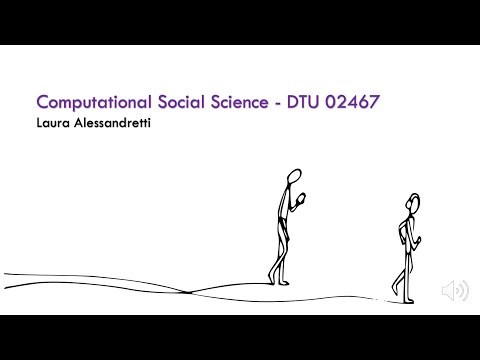

In [51]:
from IPython.display import YouTubeVideo
YouTubeVideo("oLSdlg3PUO0",width=800, height=450)


Before even starting visualizing some cool data, I just want to give a few more practical tips for making good plots in matplotlib. Unless you feel like you are already a pro-visualizer, those should be pretty useful to make your plots look much nicer. 
Paying attention to details can make an incredible difference when we present our work to others. 

**Note**: there are many Python libraries to make visualizations. For this course, we will use matplotlig, which is one of the most widely used and flexible visualization libraries. 

> *Video Lecture*: [How to improve your plots](https://www.youtube.com/watch?v=sdszHGaP_ag)

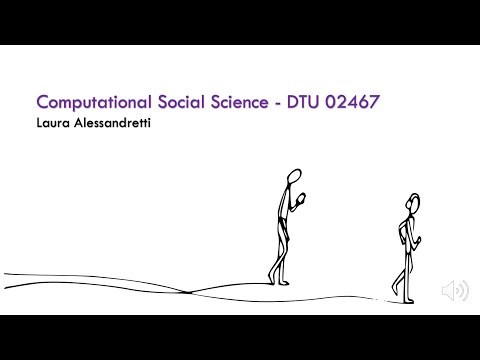

In [52]:
from IPython.display import YouTubeVideo
YouTubeVideo("sdszHGaP_ag",width=800, height=450)


## Part 3: Visualizing distributions

Relying solely on summary statistics like the mean, median, and standard deviation to understand your dataset can sometimes be misleading. It's very good practice, to begin your analysis by visualizing the data distribution. Observing the probability distribution of data points can reveal a wealth of insights.

The problem is that real-world datasets often cover a wide range of values, spanning several orders of magnitude. Hence, basic methods of plotting histograms may not effectively represent these datasets. However, there are techniques to address this challenge and enhance visualization.

In the video lecture below, I demonstrate how to plot histograms for datasets with significant heterogeneity. The techniques are shown using two examples: a financial dataset on stock prices and returns, and data on the number of comments posted by Reddit users. But these methods are universally applicable. You can use them to visualize any type of data.


> *Video Lecture*: [Plotting histograms and distributions](https://www.youtube.com/watch?v=UpwEsguMtY4)

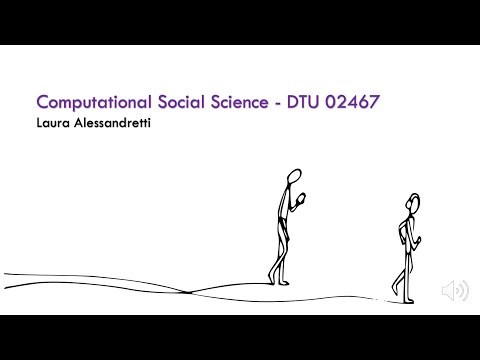

In [53]:

YouTubeVideo("UpwEsguMtY4",width=800, height=450)

> **Exercise 4: Analyzing Author Citations**  In this exercise, we aim to explore the distribution of citations per author within the field of Computational Social Science. Our objectives are twofold:
> 
> - *Learn to Plot Distributions:* We'll tackle the challenge of visualizing distributions for heterogeneous data, a common scenario in Computational Social Science.     
> - *Investigate Author Recognition:* We'll analyze how recognition (measured in citations) varies for Computational Social Scientists from different countries.    
>   
> **Dataset:** Use the final datasets "CSS Authors" (D7) and "CSS Papers" (D8).
> 
> **Tasks:**
> 1. **Data Preparation:**.   
>
>    - Extract the total number of citations for each author from the dataset and store this information in an array.
>
> 2. **Plotting the Overall Citation Distribution:**.   
> 
>    - Use [`numpy.histogram`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) to create a histogram of citations per author. Consider the following when plotting your histogram:    
> 
>        - **Number of bins:** The default behavior of `numpy.histogram` is to create 10 equally spaced bins. However, you should customize this to suit your data. Experiment with different numbers and sizes of bins to find the most informative visualization. Too few bins may oversimplify your data, while too many can result in a fragmented appearance.    
>        - **Linear vs. Logarithmic Binning** Choose the approrpiate binning:    
>          - Use *logarithmic binning* for heterogeneous data that has many extreme values (usuall in the right tail), creating bins with `numpy.logspace`.    
>          - Else, use *linear binning*, creating bins with `numpy.linspace`.    
>      - **Normalization** Where appropriate, you can convert your histogram into a Probability Density Function:    
>        - set the `density=True` argument in `numpy.histogram`. This normalizes the histogram so the area under the curve equals 1, providing insights into the probability distribution of citations.    
>
> 3. **Comparative Histograms by Country:**
>    - Identify the top 5 countries by the number of authors. For each of these countries, plot the distribution of ciations per author (as a line plot). Overlay these histograms on the same figure for comparison.
>
> 4. **Reflection questions:**
> 
>    - Did you choose linear or logarithmic binning for the histograms in tasks 2 and 3? Why?     
>    - Did you normalize the histograms? why? Describe in your own words the difference between normalized and non-normalized histograms.    
>    - How does author recognitation, as captured by the total number of citations, varies among authors in the whole dataset and in the selected countries?    


<div style="
  border:1px solid #5b2ca0;
  border-radius:10px;
  margin:20px 0;
  background:#ede0ff;
  padding:22px;
  color:#2b003d;
  line-height:1.6;
  max-width:100%;
  box-sizing:border-box;
  overflow-wrap:break-word;
">
<p>
Here, I strongly recommend you fully solve the exercise by yourself. 
Once you have a working solution, you can play with an LLM to improve the visualizations and make them look nicer. 
</p>
</div>

In [54]:
CSS_Authors = pd.read_csv("CSS_Authors_D1plusD4.csv")

# Make sure cited_by_count exists (sometimes named differently)
print(CSS_Authors.columns)


Index(['query_name', 'id', 'display_name', 'works_api_url', 'h_index',
       'works_count', 'country_code', 'matched', 'cited_by_count'],
      dtype='str')


In [55]:
# citations per author
citations = CSS_Authors["cited_by_count"].dropna().astype(float).values
# keep positive for log bins
citations_pos = citations[citations > 0]

print("Authors with citations:", len(citations_pos), "/", len(CSS_Authors))
print("min/median/max:", citations_pos.min(), np.median(citations_pos), citations_pos.max())


Authors with citations: 20702 / 22171
min/median/max: 11.0 1349.0 487786.0


Extreme outliers on the right tail.

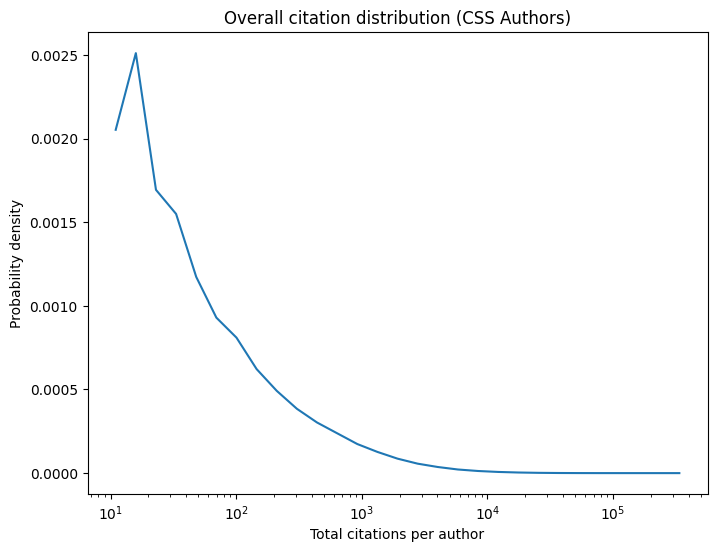

In [68]:
import matplotlib.pyplot as plt

# log bins - 30
bins = np.logspace(np.log10(citations_pos.min()), np.log10(citations_pos.max()), 30)

# set density true for probability density, false for counts
hist, edges = np.histogram(citations_pos, bins=bins, density=True)

plt.figure(figsize=(8,6))
plt.plot(edges[:-1], hist)
plt.xscale("log")
plt.xlabel("Total citations per author")
plt.ylabel("Probability density")
plt.title("Overall citation distribution (CSS Authors)")
plt.show()


Top 5 countries: ['US', 'CN', 'DE', 'GB', 'IT']


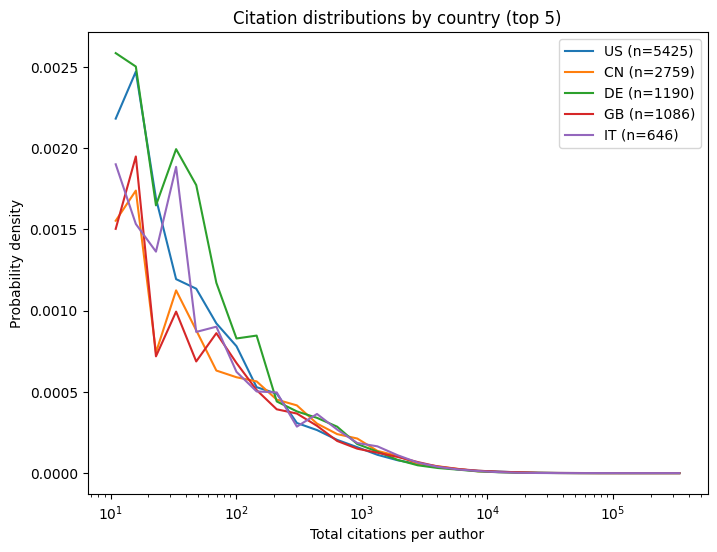

In [64]:
top5 = CSS_Authors["country_code"].dropna().value_counts().head(5).index.tolist()
print("Top 5 countries:", top5)

plt.figure(figsize=(8,6))

for country in top5:
    subset = CSS_Authors.loc[
        (CSS_Authors["country_code"] == country) &
        (CSS_Authors["cited_by_count"].notna()) &
        (CSS_Authors["cited_by_count"] > 0),
        "cited_by_count"
    ].astype(float).values

    if len(subset) < 10:
        continue

    h, _ = np.histogram(subset, bins=bins, density=True)
    plt.plot(edges[:-1], h, label=f"{country} (n={len(subset)})")

plt.xscale("log")
plt.xlabel("Total citations per author")
plt.ylabel("Probability density")
plt.title("Citation distributions by country (top 5)")
plt.legend()
plt.show()


In [66]:
print("Overall median citations:", np.median(citations_pos))

country_stats = (
    CSS_Authors[CSS_Authors["cited_by_count"].notna()]
    .groupby("country_code")["cited_by_count"]
    .agg(["count", "median", "mean", "max"])
    .sort_values("count", ascending=False)
    .head(10)
)
country_stats

Overall median citations: 1349.0


,count,median,mean,max
country_code,,,,
US,5425,1716.0,7820.963871,389619.0
CN,2759,1594.0,5548.546212,487786.0
DE,1190,992.0,4186.099160,128920.0
GB,1086,2046.0,7452.385820,193569.0
IT,646,1444.5,4235.493808,251775.0
NL,586,1972.5,6456.484642,209715.0
AU,520,2385.5,7936.559615,206474.0
CA,425,2214.0,7184.811765,245726.0
FR,400,1387.5,4984.962500,222358.0


Log bin was used since citations are a skewed metric with a long right tail. Thus, a linear bin would hide patterns among authors with low citations.

Normalization was used to compare shapes across countries while keeping different sample sizes in mind with probability density (area=1). Not normalizing would simply show the raw count.

Most authors have low citation counts but a few authors are extreme outliers with high counts. Countries primarily differ in the right tail on their figure and their median and mean values. 